## EDA 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("hospital_operations_5000.xls")
df

,Day,Doctors_On_Duty,Nurses_On_Duty,Experience_Index,Patient_Arrivals,Bed_Occupancy_percent,Avg_Treatment_Time_min,Equipment_Downtime_hr,Emergency_Cases,Medicine_Cost_per_patient,Energy_kWh,Infection_Rate_percent,Recovery_Rate_percent,Patients_Discharged,Waiting_Time_min,Maintenance_Cost_INR,Demand_Index,Revenue_INR_lakh
0,1,29,45,1.114391,654,77.184721,36.366675,1.798449,70,2016.024604,5273.895862,3.905222,90.264494,663.706348,59.866132,44387.589576,1.108315,3310.180538
1,2,30,78,0.758744,673,88.448124,33.457323,3.217767,37,1740.439378,5243.575450,5.571472,86.150789,471.701269,71.468086,55742.138264,0.975379,2070.394669
2,3,22,46,1.299433,502,67.910988,33.614243,1.145333,46,2151.394549,5627.185351,2.942107,90.234029,616.904401,52.891060,39162.663168,1.072245,2976.627109
3,4,23,51,1.088360,545,82.542393,32.721161,1.852981,79,1717.605118,4840.660604,3.988322,89.644693,564.201096,62.281860,44823.845485,1.217718,3091.671009
4,5,24,70,1.140704,675,90.501527,35.670780,0.540110,22,1860.466150,5256.400404,5.306584,87.259219,728.945039,58.901161,34320.880274,1.154582,3787.321647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,16,65,1.064470,693,60.244259,35.050029,3.742449,46,1875.306798,5427.955823,4.223740,88.708937,636.304366,62.809947,59939.589842,0.896418,2566.776714
4996,4997,18,86,1.046536,654,76.628677,31.522725,1.266217,46,1831.521758,5691.034544,5.089557,90.679902,642.195245,56.982553,40129.732304,0.834137,2410.553701
4997,4998,17,66,1.026666,518,71.610352,33.227324,0.572931,48,1976.734435,5359.879905,4.255671,87.107294,539.343381,51.508797,34583.450077,1.008869,2448.570400
4998,4999,22,46,0.626286,577,89.696508,32.956000,2.784227,62,1839.497284,4739.116149,6.252161,86.448342,298.642191,69.799737,52273.814032,1.230568,1653.747355


# Q1. What is the average number of patients discharged per day? Is the process stable?

In [80]:
avg_discharged = df['Patients_Discharged'].mean()
print("Average patients discharged per day:", avg_discharged)


Average patients discharged per day: 469.10480464091086


for stability we use Std.

In [81]:
std_discharged = df['Patients_Discharged'].std()
print("Standard deviation of patients discharged:", std_discharged)


Standard deviation of patients discharged: 139.42764577715963


Ans : Avg discharge on a perticular day is 469 and Std is +-139 so it is Unstable as Std is bit high.

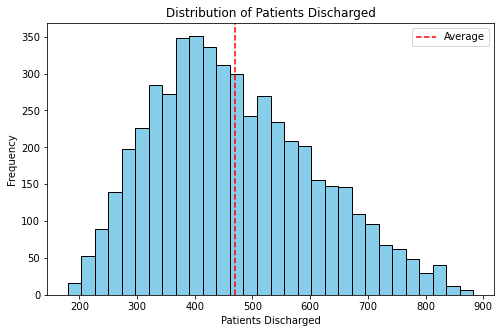

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df['Patients_Discharged'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df['Patients_Discharged'].mean(), color='red', linestyle='--', label='Average')
plt.title("Distribution of Patients Discharged")
plt.xlabel("Patients Discharged")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Q2. Is patient discharge normally distributed?

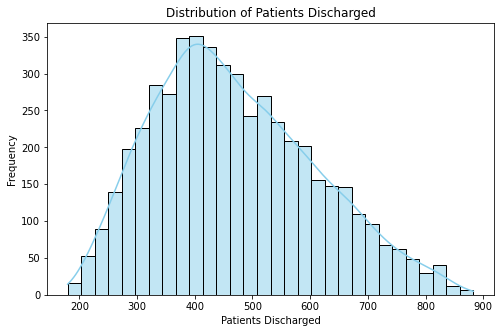

In [24]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['Patients_Discharged'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Patients Discharged")
plt.xlabel("Patients Discharged")
plt.ylabel("Frequency")
plt.show()

Ans : Since the Bell is shifted towards left and it is not normally distributed ( Not Perfectly Normal )
      But to confirm we can do Shapiro-Wilk test 

Shapiro-Wilk test 

In [26]:
from scipy.stats import shapiro

stat, p = shapiro(df['Patients_Discharged'])
print("Shapiro-Wilk Test statistic:", stat)
print("p-value:", p)

Shapiro-Wilk Test statistic: 0.9787015318870544
p-value: 9.618016334700103e-27


Ans: Since we recieved p-value 9.6e^-27  which is much smaller than 0.05 we reject the hypothsis( It is Normal Dis. )
     So, It is not Normal Distributed

# Q3. Does equipment downtime significantly reduce patients discharged?

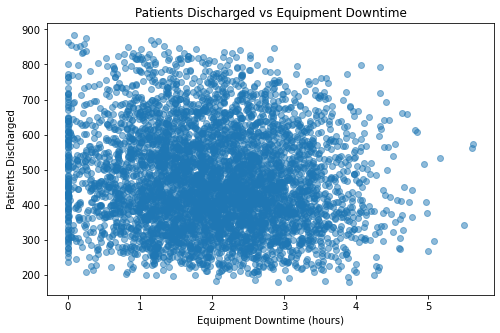

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Equipment_Downtime_hr'], df['Patients_Discharged'], alpha=0.5)
plt.title("Patients Discharged vs Equipment Downtime")
plt.xlabel("Equipment Downtime (hours)")
plt.ylabel("Patients Discharged")
plt.show()

For More Understanding we can find Corelation to predict Realtionship These two.

In [28]:
corr = df['Equipment_Downtime_hr'].corr(df['Patients_Discharged'])
print("Correlation between Equipment Downtime and Patients Discharged:", round(corr, 3))

Correlation between Equipment Downtime and Patients Discharged: -0.111


Ans : Since correlation is coming negative means we can say equipment downtime significantly reduces patients discharged

# Q4. Does higher staff experience improve throughput? 

Throughput : number of patients Discharged/per day 

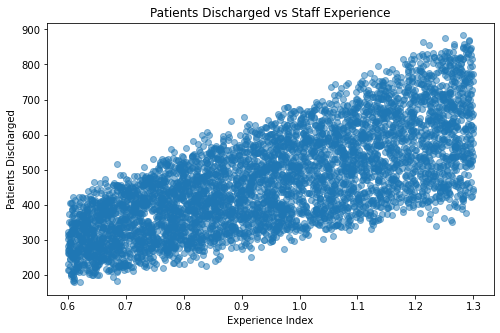

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Experience_Index'], df['Patients_Discharged'], alpha=0.5)
plt.title("Patients Discharged vs Staff Experience")
plt.xlabel("Experience Index")
plt.ylabel("Patients Discharged")
plt.show()

In [31]:
corr = df['Experience_Index'].corr(df['Patients_Discharged'])
print("Correlation between Experience Index and Patients Discharged:", round(corr, 3))

Correlation between Experience Index and Patients Discharged: 0.721


Ans : Positive CR means we can say higher staff exp. improves Throughput.

# Q5. Does bed occupancy increase waiting time?

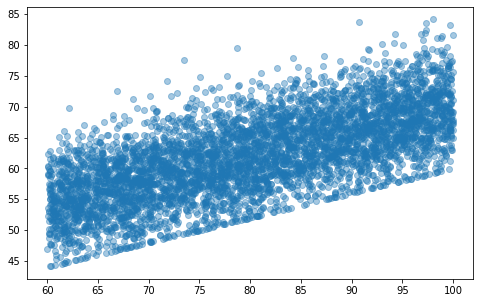

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(df['Bed_Occupancy_percent'],df['Waiting_Time_min'],alpha=0.4)
plt.show()

In [39]:
corr=df['Bed_Occupancy_percent'].corr(df['Waiting_Time_min'])
corr

0.6884394969942759

Ans: +ve Corr means we can say increasing bed occupancy increases WT.

# Q6. Are infection rates higher during high occupancy days?

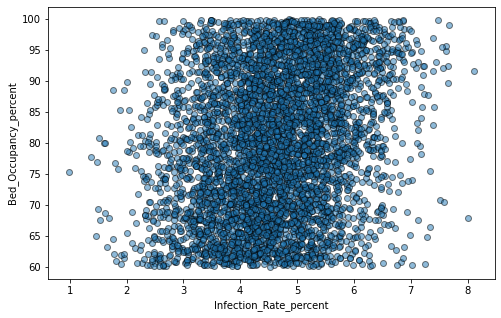

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(df['Infection_Rate_percent'],df['Bed_Occupancy_percent'],alpha=0.5,edgecolor='black')
plt.xlabel('Infection_Rate_percent')
plt.ylabel('Bed_Occupancy_percent')
plt.show()

In [51]:
Corr = df['Infection_Rate_percent'].corr(df['Bed_Occupancy_percent'])
corr

0.6884394969942759

Ans : By Scatter Plot and Corr we can say high occupancy days gives infection rates higher.

# Q7. Does downtime increase maintenance cost?

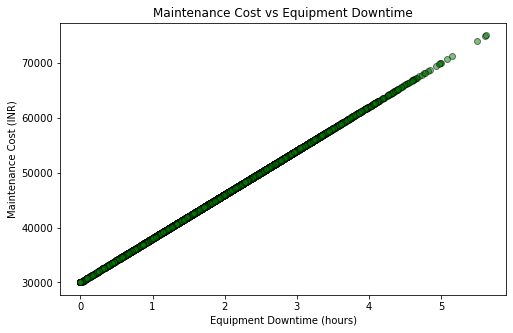

In [58]:
plt.figure(figsize=(8,5))
plt.scatter(df['Equipment_Downtime_hr'], df['Maintenance_Cost_INR'], alpha=0.5, color='green',edgecolor='black')
plt.title("Maintenance Cost vs Equipment Downtime")
plt.xlabel("Equipment Downtime (hours)")
plt.ylabel("Maintenance Cost (INR)")
plt.show()

Ans : we can see downtime increase maintenance cost Increases.

# Q8. Which factors most affect hospital revenue?

Since Revenue vs all other relation we have to see to analyise we can use Correlation Heatmap

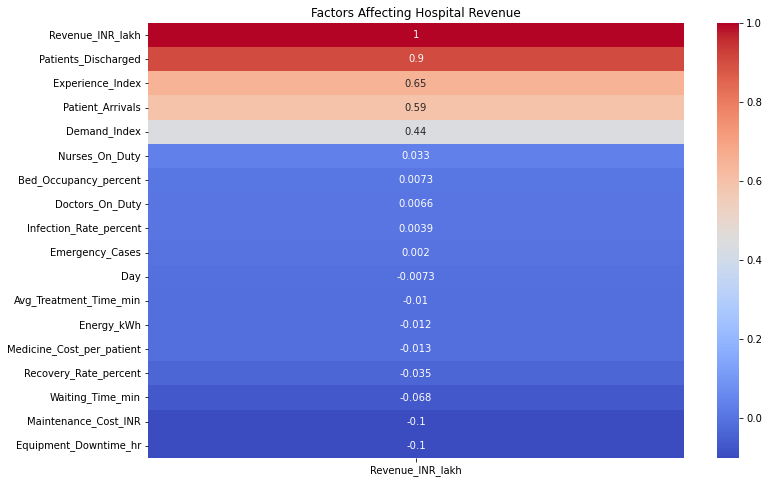

In [60]:
plt.figure(figsize=(12,8))

# correlation between all numeric columns
corr = df.corr()  

sns.heatmap(corr[['Revenue_INR_lakh']].sort_values(by='Revenue_INR_lakh', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Factors Affecting Hospital Revenue")
plt.show()

Ans: As we can see Patient Discharged has highest +ve Corr means that afects the revenue mostly.

# Q9. Does longer treatment time reduce throughput?

Throughput : number of patients Discharged/per day

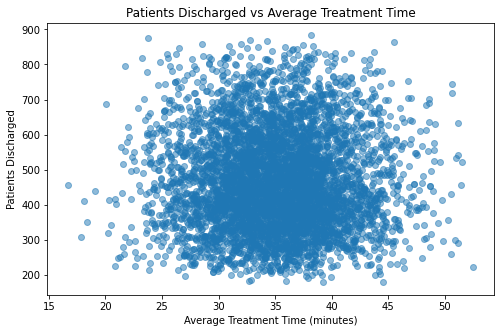

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(df['Avg_Treatment_Time_min'], df['Patients_Discharged'], alpha=0.5)
plt.title("Patients Discharged vs Average Treatment Time")
plt.xlabel("Average Treatment Time (minutes)")
plt.ylabel("Patients Discharged")
plt.show()

Nothing clear about the Question from this Scatter plot so we can do Corr Test

In [65]:
corr = df['Patients_Discharged'].corr(df['Avg_Treatment_Time_min'])
corr

-0.006226927441974954

Ans: Now we can see this is -ve Correaltion so If there is longer treatment time then Patient Discharged is reduced so throughput reduces.

# Q10. What is the 95% confidence interval of recovery rate?

In [67]:
from scipy import stats
import numpy as np

data = df['Recovery_Rate_percent']

mean = np.mean(data)
sem = stats.sem(data)  # standard error of the mean

ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)

print("95% Confidence Interval:", ci)


95% Confidence Interval: (89.20719056688657, 89.29779674999753)


Ans: We can say that 95% of the Recovery Rate Data lies in Range 89.20% to 89.29% means a patient prob of getting recovered lies in this range.

# Q11. What % of days have waiting time > 60 minutes?

In [68]:
total_days = len(df)
days_over_60 = (df['Waiting_Time_min'] > 60).sum()

percent_over_60 = (days_over_60 / total_days) * 100
percent_over_60


60.62

Ans: We can Say That 60.62% of days have waiting time greater than 60 min.

# Q12. Are emergency cases associated with higher infection rates?

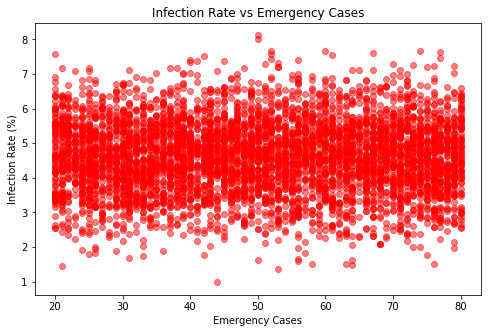

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Emergency_Cases'], df['Infection_Rate_percent'], alpha=0.5, color='red')
plt.title("Infection Rate vs Emergency Cases")
plt.xlabel("Emergency Cases")
plt.ylabel("Infection Rate (%)")
plt.show()

Not Clear so Corr 

In [71]:
corr = df['Emergency_Cases'].corr(df['Infection_Rate_percent'])
corr

0.007171094242600324

Ans: Slight +ve corr so it means Increasing emergency Cases Increases Infection Rate

# Q13. Which variable shows highest variability?

Since Variability is asked we need to calculate Std of All variables

In [73]:
variability = df.std()
variability_sorted = variability.sort_values(ascending=False)
print(variability_sorted)

Maintenance_Cost_INR         7807.038351
Day                          1443.520003
Revenue_INR_lakh              744.684972
Energy_kWh                    402.974759
Medicine_Cost_per_patient     150.616255
Patients_Discharged           139.427646
Patient_Arrivals              101.975434
Emergency_Cases                17.693056
Nurses_On_Duty                 14.746015
Bed_Occupancy_percent          11.497193
Waiting_Time_min                6.727330
Avg_Treatment_Time_min          5.080772
Doctors_On_Duty                 4.612664
Recovery_Rate_percent           1.634028
Infection_Rate_percent          1.031151
Equipment_Downtime_hr           0.975880
Experience_Index                0.201734
Demand_Index                    0.144920
dtype: float64


Ans: As we can see the variability is highest in Maintenance Cost.

# Q14. Predict number of patients discharged using regression.

In [82]:
df.head()

,Day,Doctors_On_Duty,Nurses_On_Duty,Experience_Index,Patient_Arrivals,Bed_Occupancy_percent,Avg_Treatment_Time_min,Equipment_Downtime_hr,Emergency_Cases,Medicine_Cost_per_patient,Energy_kWh,Infection_Rate_percent,Recovery_Rate_percent,Patients_Discharged,Waiting_Time_min,Maintenance_Cost_INR,Demand_Index,Revenue_INR_lakh
0,1,29,45,1.114391,654,77.184721,36.366675,1.798449,70,2016.024604,5273.895862,3.905222,90.264494,663.706348,59.866132,44387.589576,1.108315,3310.180538
1,2,30,78,0.758744,673,88.448124,33.457323,3.217767,37,1740.439378,5243.575450,5.571472,86.150789,471.701269,71.468086,55742.138264,0.975379,2070.394669
2,3,22,46,1.299433,502,67.910988,33.614243,1.145333,46,2151.394549,5627.185351,2.942107,90.234029,616.904401,52.891060,39162.663168,1.072245,2976.627109
3,4,23,51,1.088360,545,82.542393,32.721161,1.852981,79,1717.605118,4840.660604,3.988322,89.644693,564.201096,62.281860,44823.845485,1.217718,3091.671009
4,5,24,70,1.140704,675,90.501527,35.670780,0.540110,22,1860.466150,5256.400404,5.306584,87.259219,728.945039,58.901161,34320.880274,1.154582,3787.321647


In [83]:
df.Patients_Discharged.sum()

2345524.023204566

# Q15. What conditions correspond to top 10% revenue days?

In [76]:
top_10pct_threshold = df['Revenue_INR_lakh'].quantile(0.9)

top_days = df[df['Revenue_INR_lakh'] >= top_10pct_threshold]

print(top_days.mean())


Day                           2510.046000
Doctors_On_Duty                 22.816000
Nurses_On_Duty                  64.910000
Experience_Index                 1.167494
Patient_Arrivals               631.702000
Bed_Occupancy_percent           79.845865
Avg_Treatment_Time_min          35.143193
Equipment_Downtime_hr            1.818421
Emergency_Cases                 50.266000
Medicine_Cost_per_patient     1795.872999
Energy_kWh                    5486.578856
Infection_Rate_percent           4.561273
Recovery_Rate_percent           89.158026
Patients_Discharged            700.061960
Waiting_Time_min                61.030449
Maintenance_Cost_INR         44547.364921
Demand_Index                     1.182440
Revenue_INR_lakh              3709.410903
dtype: float64
